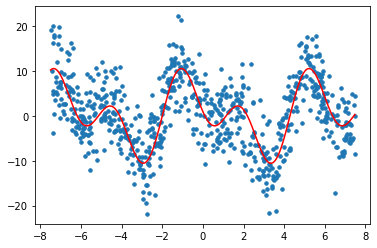

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def f_true(x):
  y = 6.0 * (np.sin(x + 2) + np.sin(2*x + 4))
  return y
n = 750                                  # Number of data points
X = np.random.uniform(-7.5, 7.5, n)      # Training examples, in one dimension
e = np.random.normal(0.0, 5.0, n)        # Random Gaussian noise
y = f_true(X) + e                        # True labels with noise

plt.figure()

# Plot the data
plt.scatter(X, y, 12, marker='o')     #With gaussian noise       

# Plot the true function, which is really "unknown"
x_true = np.arange(-7.5, 7.5, 0.02)
y_true = f_true(x_true)
plt.plot(x_true, y_true, marker='None', color='r') # Just the sin wave signal

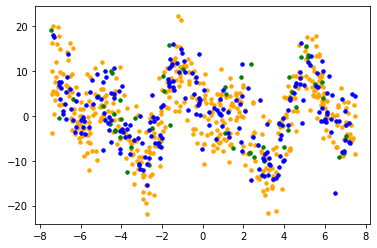

In [2]:
from sklearn.model_selection import train_test_split
tst_frac = 0.3  # Fraction of examples to sample for the test set
val_frac = 0.1  # Fraction of examples to sample for the validation set

# First, we use train_test_split to partition (X, y) into training and test sets
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, random_state=42)

# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, random_state=42)

# Plot the three subsets
plt.figure()
plt.scatter(X_trn, y_trn, 12, marker='o', color='orange')
plt.scatter(X_val, y_val, 12, marker='o', color='green')
plt.scatter(X_tst, y_tst, 12, marker='o', color='blue')

In [3]:
# X float(n, ): univariate data
# d int: degree of polynomial  

def polynomial_transform(X, d):
    dim_array2=[]
    for value in X:
        dim_array1=[]
        power = 0
        while power < d+1:
            dim_array1.append(value ** power)
            power = power + 1
        dim_array2.append(dim_array1)
        
    polynomial_array = np.array(dim_array2)
    return polynomial_array



In [56]:
# Phi float(n, d): transformed data
# y   float(n,  ): labels

def train_model(Phi, y):
    w = (np.linalg.inv(np.transpose(Phi)@Phi))@np.transpose(Phi)@y
    return w



In [57]:
# Phi float(n, d): transformed data
# y float(n, ): labels
# w float(d, ): linear regression model 

def evaluate_model(Phi, y, w):
    y_pre = Phi@w
    error = (y_pre - y )**2
    sum = 0
    for value in error:
        sum = sum+value
    return sum/len(y)    

(2.0, 25.0, 15.0, 60.0)

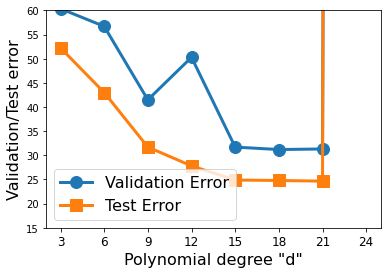

In [59]:
w = {}               # Dictionary to store all the trained models
validationErr = {}   # Validation error of the models
testErr = {}         # Test error of all the models

for d in range(3, 25, 3):  # Iterate over polynomial degree from 3 to 25 in steps of 3
    Phi_trn = polynomial_transform(X_trn, d)                 # Transform training data into d dimensions
    w[d] = train_model(Phi_trn, y_trn)                       # Learn model on training data
    
    Phi_val = polynomial_transform(X_val, d)                 # Transform validation data into d dimensions
    validationErr[d] = evaluate_model(Phi_val, y_val, w[d])  # Evaluate model on validation data
    
    Phi_tst = polynomial_transform(X_tst, d)           # Transform test data into d dimensions
    testErr[d] = evaluate_model(Phi_tst, y_tst, w[d])  # Evaluate model on test data

# Plot all the models
plt.figure()
plt.plot(validationErr.keys(), validationErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(testErr.keys(), testErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('Polynomial degree "d"', fontsize=16)
plt.ylabel('Validation/Test error', fontsize=16)
plt.xticks(list(validationErr.keys()), fontsize=12)
plt.legend(['Validation Error', 'Test Error'], fontsize=16)
plt.axis([2, 25, 15,60])


Observation: As shown in the graph, after d = 21, the validation error and test error is way too high. When d = 15,18,21, both the errors are minimum which suggests d{15,18,21} could be a best choice given everything.


(-8.0, 8.0, -15.0, 15.0)

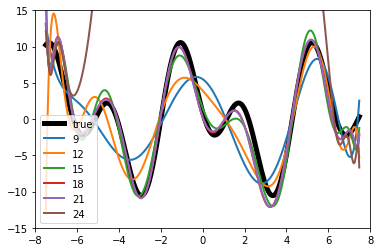

In [46]:
plt.figure()
plt.plot(x_true, y_true, marker='None', linewidth=5, color='k')
for d in range(9, 25, 3):
    X_d = polynomial_transform(x_true, d)
    y_d = X_d @ w[d]
    plt.plot(x_true, y_d, marker='None', linewidth=2)

plt.legend(['true'] + list(range(9, 25, 3)))
plt.axis([-8, 8, -15, 15])



Observation:
This chart coincides with the finding from the above graph

In [47]:
# X float(n, ): univariate data
# B float(n, ): basis functions
# gamma float : standard deviation / scaling of radial basis kernel
def radial_basis_transform(X, B, gamma=0.1):
    dim_array2=[]
    d = len(B)
    for value in X:
        dim_array1=[]
        center = 0
        while center < d :
            dim_array1.append(np.exp(-1*gamma*((value-B[center])**2)))
            center = center +1
        dim_array2.append(dim_array1)
    radial_basis = np.array(dim_array2)
    return radial_basis

In [54]:
# Phi float(n, d): transformed data
# y   float(n,  ): labels
# lam float      : regularization parameter
def train_ridge_model(Phi, y, lmd):
    w = (np.linalg.inv((np.transpose(Phi)@Phi) + (lmd*np.eye(len(y)))))@Phi@y
    return w

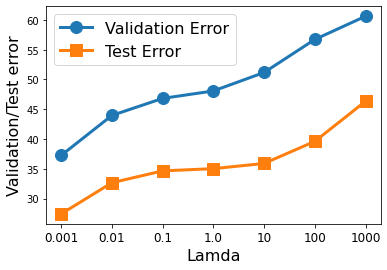

In [55]:
w1 = {}               # Dictionary to store all the trained models
validationErr1 = {}   # Validation error of the models
testErr1 = {}         # Test error of all the models
lamda=[0.001,0.01,0.1,1,10,100,1000] 
x1 = []
for x in range(0, len(lamda)):
    x1.append(x)
for lam_index, lam in enumerate(lamda):  # Iterate over lamda values from the list
    Phi_trn1 = radial_basis_transform(X_trn,X_trn,0.1)  # Transform training data                
    w1[lam_index] = train_ridge_model(Phi_trn1, y_trn,lam)  # Learn model on training data
        
    Phi_val1 = radial_basis_transform(X_val,X_trn,0.1) # Transform validation data
    validationErr1[lam_index] = evaluate_model(Phi_val1, y_val, w1[lam_index])  # Evaluate model on validation data
    Phi_tst1 = radial_basis_transform(X_tst,X_trn,0.1) # Transform test data 
    testErr1[lam_index] = evaluate_model(Phi_tst1, y_tst, w1[lam_index])  # Evaluate model on test data

# Plot all the models
plt.figure()
plt.plot(x1, validationErr1.values(), marker='o', linewidth=3, markersize=12)
plt.plot(x1, testErr1.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('Lamda', fontsize=16)
plt.ylabel('Validation/Test error', fontsize=16)
plt.xticks(x1, ('0.001', '0.01', '0.1', '1.0', '10','100','1000'),fontsize=12)
plt.legend(['Validation Error', 'Test Error'], fontsize=16)

Observation:
From the above graph, lamda values are 0.001 and 0.01 as they give the minimum validation error and test error

(-8.0, 8.0, -15.0, 15.0)

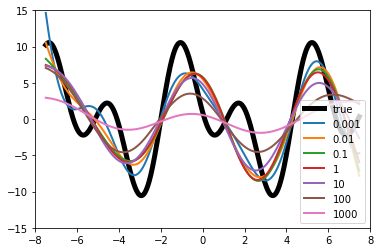

In [28]:
plt.figure()
plt.plot(x_true, y_true, marker='None', linewidth=5, color='k')
lamda=[0.001,0.01,0.1,1,10,100,1000]

for lam_index, lam in enumerate(lamda):
    X_d1 = radial_basis_transform(x_true,X_trn,gamma=0.1)
    y_d1 = X_d1 @ w1[lam_index]
    plt.plot(x_true, y_d1, marker='None', linewidth=2)

plt.legend(['true'] + lamda)
plt.axis([-8, 8, -15, 15])

Observation:
Linerity of the model increases with increase in lamda. As the lamda value increases, the curve becomes more deviated from the true value x. As lamda increases, the curve becomes less and less curvy and becomes close to linerity.
